$$\require{cancel}$$
$$\require{separator}$$

https://www.youtube.com/shorts/5xp0taGM3Kg

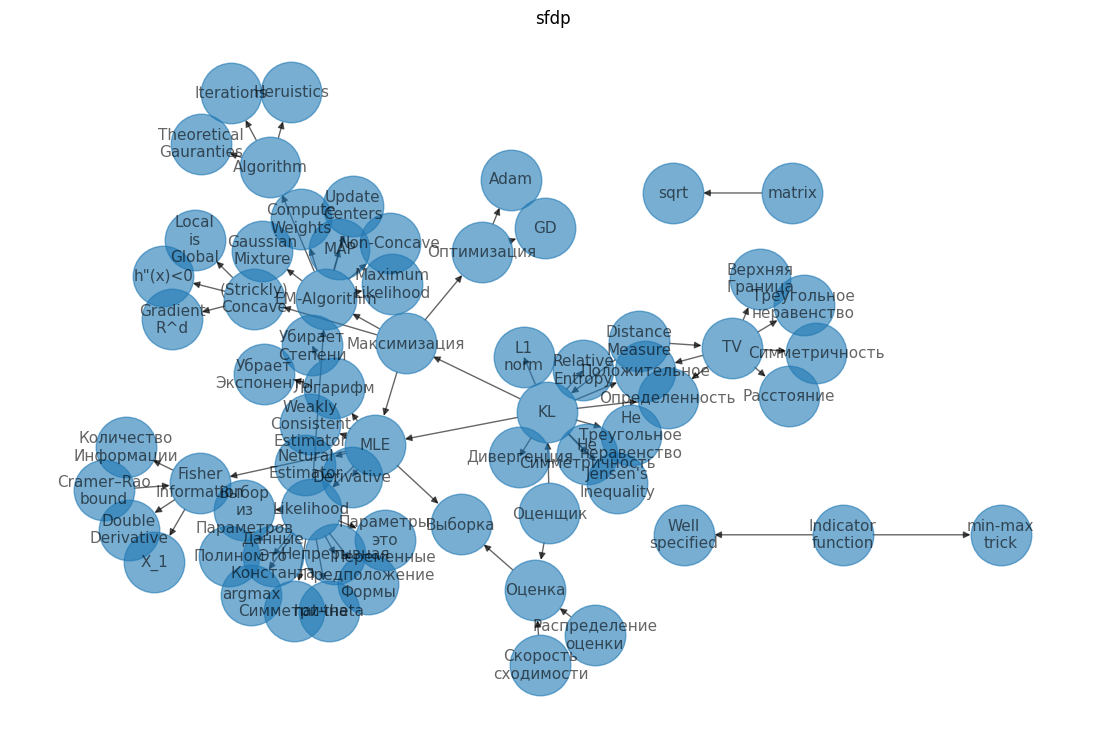

In [1]:
from knowledge import show_graph, showg, load, save, append
d = load('0309')
showg(d, figsize=(14,9), font_size=11, root='MLE')

# Определения

Дадим пару определений

**Log Likelihood**
$$\displaystyle\ell_x(\theta)=\ln L_x(\theta)$$
> Это функция параметра от данных. получается что у нас есть выборка, и набор параметров который мы хотим протестировать, чтобы найти тот кто даст наибольшее правдоподобие. Для того чтобы обозначить что это функция для фиксированных данных, мы ставим $X$ в основании функции $\ell_{\color{red}{X}}(\theta)$.\
Если у нас будут другие данные, то и результат функции будет другой.\
А значит $\ell_X(\theta)$ - это **случайная переменная**. Случайность результата функции можно приписать и размеру выборки, $n$, поэтому мы обозначаем размер выборки как $\ell_\color{red}{n}(\theta)$

In [2]:
append(d, 'Likelihood', 'LogLikelihood')
append(d, 'LogLikelihood', 'Score')

**The Score**\
$$U(\theta)=\ell_n'(\theta)=\dfrac{\partial}{\partial\theta}\ell_n(\theta)$$
> По простому - это первая производная Log Likelihood

**Fisher Information**

>Мы предполагаем что дифференцеирование можно записать под знаком интеграла. Для большенства распределений это возможно, но мы должны учитывать что это возможно.\
> $\displaystyle\color{blue}{\dfrac{\partial^k}{\partial\theta^k}}\color{red}{\int} f_\theta(x)\partial x= \color{red}{\int}\color{blue}{\dfrac{\partial^k}{\partial\theta^k}} f_\theta(x)\partial x$

$$\begin{align}
\displaystyle\mathcal{I}_n(\theta)&=\text{Var}(\ell_n'(\theta))=n\text{Var}(\ell_1'(\theta))=n\mathcal{I}_1(\theta)\\
\displaystyle&=-\mathbb{E}[\ell_n"(\theta))]=-\mathbb{E}\left[\sum_{i=1}^n\dfrac{\partial^2}{\partial\theta^2}\ln f_\theta(X_i)\right]
\end{align}$$

> информация фишера - это дисперсия первой производной от Log Likelihood. Если у нас выборка размера $n$ тогда это $n\mathcal{I}_m(\theta)$ - что просто умножение на $n$
> также это отрицательное мат. ожидание от двойной производной Log Likelihood, что можно переписать как сумму двойных производная логарифма PDF

https://www.youtube.com/watch?v=2jFFpb9dlWg

# Производная от логарифма.

**Задано:**
Логарифм функции правдоподобия:  
$ \ell = \ln f. $

**Нужно найти:**
Первую производную от $\ell $ по параметру $\theta $:  
$ \ell' = \frac{\partial}{\partial \theta} \ln f. $

**Шаги:**

1. **Правило цепочки:**
   Напомним правило цепочки для дифференцирования логарифмической функции:
   $ \frac{d}{dx} \ln g(x) = \frac{g'(x)}{g(x)}. $

2. **Применим правило цепочки к $\ell $:**
   $ \ell' = \frac{\partial}{\partial \theta} \ln f = \frac{\partial f / \partial \theta}{f} = \frac{f'}{f}. $

   Здесь:
   - $\frac{\partial}{\partial \theta} \ln f $ — производная логарифма по параметру $\theta $.
   - $\frac{\partial f}{\partial \theta} = f' $ — производная функции плотности вероятности $f $ по параметру $\theta $.

Таким образом, мы получаем:
$$\fbox{$ \ell' = \frac{f'}{f}. $}$$

**Пример:**

Рассмотрим простой пример с нормальным распределением:
$ f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right). $

Найдём логарифм функции правдоподобия $\ell $ и её производную по параметру $\mu $:

1. **Логарифм функции правдоподобия:**
$ \ell = \ln f(x; \mu, \sigma) = -\frac{1}{2} \ln (2 \pi \sigma^2) - \frac{(x - \mu)^2}{2 \sigma^2}. $

2. **Производная по параметру $\mu $:**
$ \ell'_{\mu} = \frac{\partial}{\partial \mu} \ell = \frac{\partial}{\partial \mu} \left( -\frac{(x - \mu)^2}{2 \sigma^2} \right) = \frac{x - \mu}{\sigma^2}. $

Чтобы убедиться, что это соответствует формуле $\ell' = \frac{f'}{f} $, найдем производную от $f $ по параметру $\mu $:

$ f'_{\mu} = \frac{\partial}{\partial \mu} f = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right) \cdot \frac{x - \mu}{\sigma^2}. $

Теперь поделим $f'_{\mu} $ на $f $:
$ \frac{f'_{\mu}}{f} = \frac{\frac{1}{\sqrt{2 \pi \sigma^2}} \cdot \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right) \cdot \frac{x - \mu}{\sigma^2}}{\frac{1}{\sqrt{2 \pi \sigma^2}} \cdot \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)} = \frac{x - \mu}{\sigma^2}. $

Это совпадает с:
$ \ell'_{\mu} = \frac{x - \mu}{\sigma^2}. $

**Вопрос:** Помогло ли это объяснение прояснить шаг с первой производной?

# Ожидание

Позволь мне объяснить это понятие более подробно. Оно связано с основным свойством интеграла от производной.

**Основное свойство интеграла от производной:**

Если функция $g(x) $ имеет непрерывную производную $g'(x) $ на промежутке $[a, b] $, то интеграл от производной функции по этому промежутку будет равен разности значений самой функции в конечных точках промежутка:
$ \int_{a}^{b} g'(x) \, dx = g(b) - g(a). $

Это свойство называется **Основная теорема анализа**, или **Основная теорема интегрального исчисления**.

**Применение к нашей задаче:**

В нашем случае $g(x) $ — это функция плотности вероятности $f(x; \theta) $, зависящая от параметра $\theta $. Для функции плотности $f(x; \theta) $ должно выполняться следующее условие нормировки:
$ \int_{-\infty}^{\infty} f(x; \theta) \, dx = 1. $

Теперь рассмотрим производную этой функции по параметру $\theta $:
$ \dfrac{\partial}{\partial \theta} \int_{-\infty}^{\infty} f(x; \theta) \, dx = 0, $
так как левая часть всегда равна единице и не зависит от $\theta $.

С другой стороны, по правилу дифференцирования под знаком интеграла:
$ \int_{-\infty}^{\infty} \dfrac{\partial}{\partial \theta} f(x; \theta) \, dx = 0. $

Это означает, что интеграл от производной функции плотности по параметру $\theta $ равен нулю:
$ \int_{-\infty}^{\infty} f'(x; \theta) \, dx = 0. $

Теперь вернемся к функции скор:
$ \ell'_n(\theta) = \sum_{i = 1}^{n} \dfrac{f^{'}(X_i; \theta)}{f(X_i; \theta)}. $

**Математическое ожидание от функции скор для одного наблюдения:**
$ \mathbb{E}\left[ \dfrac{f^{'}(X_i; \theta)}{f(X_i; \theta)} \right] = \int_{-\infty}^{\infty} \frac{f^{'}(x; \theta)}{f(x; \theta)} f(x; \theta) \, dx = \int_{-\infty}^{\infty} f^{'}(x; \theta) \, dx = 0. $

Так как каждое наблюдение $X_i $ независимо и одинаково распределено, математическое ожидание функции скор для всей выборки также равно нулю:
$ \mathbb{E}[\ell_n^{'}(\theta)] = \sum_{i = 1}^{n} \mathbb{E}\left[ \dfrac{f^{'}(X_i; \theta)}{f(X_i; \theta)} \right] = \sum_{i = 1}^{n} 0 = 0. $

**Резюме:**
Основное свойство интеграла от производной означает, что интеграл от производной функции плотности по параметру $\theta $ равен нулю, что приводит к нулевому математическому ожиданию функции скор.

**Вопрос:** Стало ли понятнее основное свойство интеграла от производной и его применение в этой задаче?

In [20]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm

# Заданные параметры нормального распределения
mu = 0
sigma = 1

# Функция плотности вероятности нормального распределения
def normal_pdf(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

# Производная функции плотности вероятности по параметру mu
def normal_pdf_prime_mu(x, mu, sigma):
    return - (x - mu) / (sigma ** 2) * normal_pdf(x, mu, sigma)

def normal_pdf_double_prime_mu(x, mu, sigma):
    return - (sigma**2 -x**2) / (sigma ** 4) * normal_pdf(x, mu, sigma)

# Интеграл от производной функции плотности по mu
prime_integral_result, _ = quad(normal_pdf_prime_mu, -np.inf, np.inf, args=(mu, sigma))

double_prime_integral_result, _ = quad(normal_pdf_double_prime_mu, -np.inf, np.inf, args=(mu, sigma))

prime_integral_result, double_prime_integral_result


(0.0, 1.0269562977782698e-15)

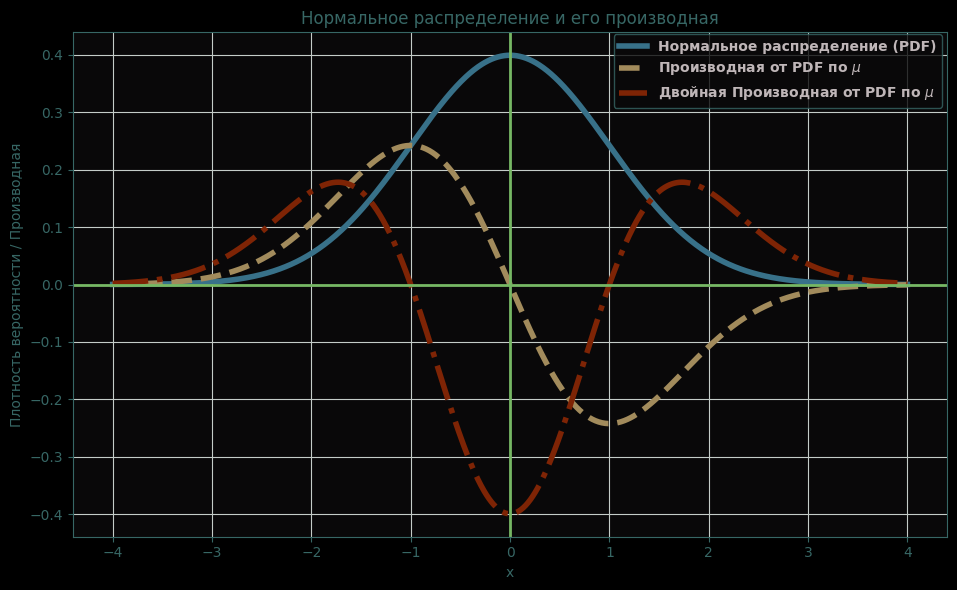

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Заданные параметры нормального распределения
mu = 0
sigma = 1

# График функции плотности нормального распределения
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
pdf = norm.pdf(x, mu, sigma)

# Производная функции плотности нормального распределения по параметру mu
def normal_pdf_prime_mu(x, mu, sigma):
    return - (x - mu) / (sigma ** 2) * norm.pdf(x, mu, sigma)

def normal_pdf_double_prime_mu(x, mu, sigma):
    return - (sigma**2 -x**2) / (sigma ** 4) * norm.pdf(x, mu, sigma)

pdf_prime = normal_pdf_prime_mu(x, mu, sigma)
pdf_boudle_prime = normal_pdf_double_prime_mu(x, mu, sigma)
# Построение графиков
fig = plt.figure(figsize=(10, 6))

# plt.plot(x, pdf, label='Нормальное распределение (PDF)')
# plt.plot(x, pdf_prime, label='Производная от PDF по $\mu$', linestyle='--')
# plt.plot(x, pdf_boudle_prime, label='Двойная Производная от PDF по $\mu$', linestyle='-.')


plt.plot(x, pdf, label='Нормальное распределение (PDF)', color='#387189',linewidth=4)
plt.plot(x, pdf_prime, label='Производная от PDF по $\mu$', linestyle='--', color="#a28b5c",linewidth=4)
plt.plot(x, pdf_boudle_prime, label='Двойная Производная от PDF по $\mu$', linestyle='dashdot', color="#7e2405",linewidth=4)



plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(mu, color='black', linewidth=0.5)

# mech style
ax = plt.gca()
ax.set_facecolor('#090809')
plt.axhline(0, color='#76b864', linewidth=2)
plt.axvline(mu, color='#76b864', linewidth=2)
plt.grid(True, color="#c4ccc8")
plt.legend(labelcolor='#376765')
plt.xlabel('x', color='#376765')
plt.ylabel('Плотность вероятности / Производная', color='#376765')
legend_properties = {'weight':'bold'}

legend = plt.legend(edgecolor="#376765", frameon=True, prop=legend_properties, loc=(0.6185, 0.85))
# legend.get_frame().set_alpha(0)
legend.get_frame().set_facecolor("#090809")
legend.get_frame().set_facecolor("#090809")

for text in legend.get_texts():
    text.set_color("#bfb6b8")
# edgecolor="black"
# plt.xlabel('x')
# plt.ylabel('Плотность вероятности / Производная')
plt.title('Нормальное распределение и его производная', color="#376765")
# plt.grid(True)

ax.spines['bottom'].set_color('#376765')
ax.spines['left'].set_color('#376765')
ax.spines['right'].set_color('#376765')
ax.spines['top'].set_color('#376765')
ax.xaxis.label.set_color('#376765')
ax.yaxis.label.set_color('#376765')
ax.tick_params(axis='x', colors='#376765')
ax.tick_params(axis='y', colors='#376765')
plt.rcParams.update({
#     "lines.color": "white",
#     "patch.edgecolor": "white",
#     "text.color": "black",
#     "axes.facecolor": "white",
#     "axes.edgecolor": "lightgray",
#     "axes.labelcolor": "white",
#     "xtick.color": "white",
#     "ytick.color": "white",
#     "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})
plt.tight_layout()
plt.show()


График плотности нормального распределения (сплошная линия) и его производная по параметру \( \mu \) (пунктирная линия). 

- **Нормальное распределение (PDF):** Центрировано вокруг среднего значения \( \mu = 0 \) с дисперсией \( \sigma = 1 \).

- **Производная от PDF по \( \mu \):**  
  - Слева от среднего (отрицательные значения \( x \)) производная положительна.
  - Справа от среднего (положительные значения \( x \)) производная отрицательна.
  - Области выше и ниже оси \( x \) компенсируют друг друга, поэтому интеграл производной равен нулю.

# The Score Function - Asymptotic Normality

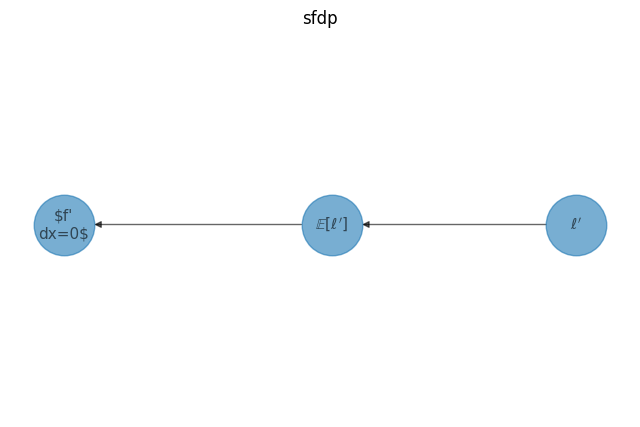

In [13]:
dg={}
append(dg, r"$\ell'$", r"$\mathbb{E}[\ell']$")
append(dg, r"$\mathbb{E}[\ell']$", r"$f' dx=0$")

showg(dg, figsize=(8,5), font_size=11, root='MLE')

> (1) если  мы интегрирую pdf на всем пространстве $X$ то получиться 1, это определение PDF

$$\int f_\theta(x)dx=1\quad \forall\, \text{pdf} f$$

> (2) Если взять производную от интеграла и потому что мы можем поместить производную под знак интеграла, мы получаем производную от PDF, тогда поулчиться 0, потому что производная $1'=0$
$$\begin{gather*}
\int\dfrac{\partial^k}{\partial\theta^k}f_\theta(x)dx=0 \,,\, k\in\mathbb{N}_+\\
\int f'_\theta(x)dx=0\,,\, k=1;\\
\int f^{"}dx =0\,,\, k=2
\end{gather*}$$
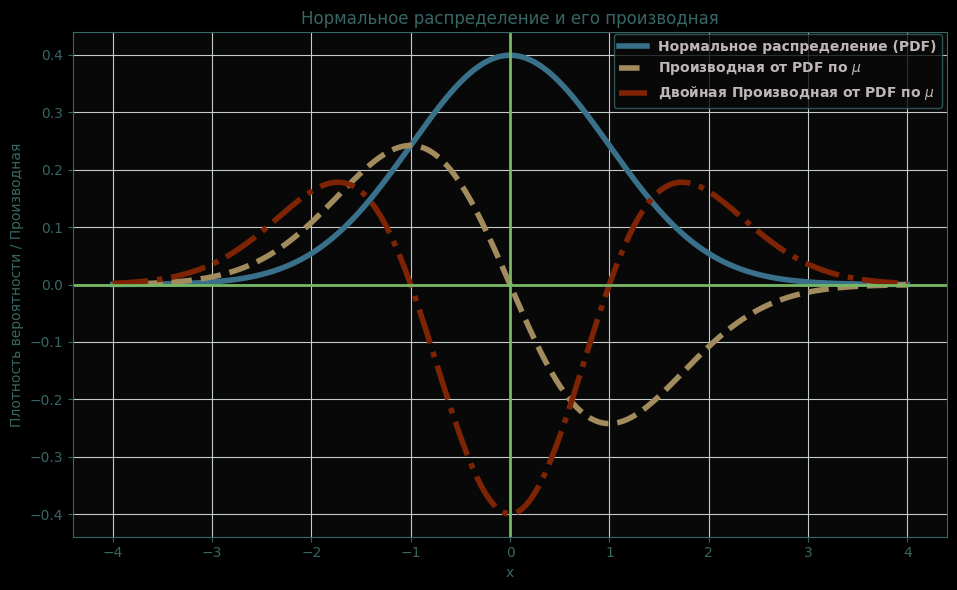
> (3) рассмотрим Log Likelihood, мы его определяем как $\ell=\ln f$. Когда мы возмем производную от логарифма, то получаем

$$\ell'=\color{blue}{\dfrac{f'}{f}} \quad \ell"=\dfrac{f"}{f}-\left(\color{blue}{\dfrac{f'}{f}}\right)^2$$
> Тут мы видим след $\frac{f'}{f}$ - это Score функция, в двойном интеграле , у нас еще есть слогаемое Score^2

$(\dfrac{f'}{f})' = \dfrac{f''}{f} - \dfrac{f'}{f}^{2}$

> (4) возмем мат ожидание от Score

$$\mathbb{E}[\ell']=\int\ell'f dx=\int \dfrac{f'}{\bcancel{f}}\bcancel{f}dx=\int f'dx=0$$
> возмем мат ожидание от двойного интеграла

$$\displaystyle\mathbb{E}[\ell"]=\int \left(\dfrac{f"}{f}-\left(\dfrac{f'}{f}\right)^2 \right)\cdot fdx\\
=\int \dfrac{f"}{\bcancel{f}}\bcancel{f}-\left(\dfrac{f'}{f}\right)^2 f\,dx\\
=\int f"-\left(\dfrac{f'}{f}\right)^2 f\,dx\\
=\int f"dx-\int \left(\dfrac{f'}{f}\right)^2 f\,dx\\
=\int f"dx-\mathbb{E}\left[\left(\dfrac{f'}{f}\right)^2\right]\\
=0-\mathbb{E}\left[\left(\dfrac{f'}{f}\right)^2\right]\\
$$

> вспомним что $\dfrac{f'}{f}$ это Score function\
> и еще вспомним определение Variance $\text{Var}(\ell')=\mathbb{E}[\ell'^2]-(\mathbb{E}[\ell'])^2$\
> из определений выше мы знаем что $(\mathbb{E}[\ell'])^2=(0)^2=0$\
> тогда:

$$=-\mathbb{E}\left[{\ell'}^2\right]=-\text{Var}(\ell')$$


> (5)
$$\begin{align}
f_\theta(X_1,\dots,X_n)&=\prod_{i=1}^n f_\theta(X_i)\,\, \textit{ since }X_i\textit{  i.i.d.}\\
\ell_n(\theta)&=\sum_{i=1}^n\log f_\theta(X_i)\\
\ell^{'}_n(\theta)&=\sum_{i=1}^n\frac{\partial}{\partial\theta}\log f_\theta(X_i)\,\, \textit{Score}\\
\ell^{''}_n(\theta)&=\sum_{i=1}^n\frac{\partial^2}{\partial^2\theta}\log f_\theta(X_i)
\end{align}
$$

> Отсюда все начианет быть очень инетерсным, потому что Law Of Large Numbers говорит что если делать что-то достаточно продолжительно, средняя выборки приближается в пределе к теоретической средней.\
> Поэтому если взглянуть на Score то факту это сумма iid перменные
$$\ell^{'}_n(\theta)=\color{red}{\sum_{i=1}^n}\color{blue}{\frac{\partial}{\partial\theta}\log f_\theta(X_i)}$$
> если мы поделим ее на $n$ то это бутед похоже на Среднее
$$\dfrac{\ell^{'}_n(\theta)}{\color{magenta}{n}}=\color{magenta}{\dfrac{1}{n}}\color{red}{\sum_{i=1}^n}\color{blue}{\frac{\partial}{\partial\theta}\log f_\theta(X_i)}=\mathbb{E}\left[\frac{\partial}{\partial\theta}\log f_\theta(X_1)\right]$$

> (6) Вспомним про Fisher Information это отрицательная дисперсия Score функции

$$\mathcal{I}_n(\theta)=n\mathcal{I}_1(\theta)=n\text{Var}(\ell_1^{'}(\theta))$$

$$\mathcal{I}_n(\theta)=\text{Var}(\ell_n^{'}(\theta))=\text{Var}\left(\sum_{i=1}^n \frac{\partial}{\partial\theta}\log f_\theta(X_i)\right)\\
=\sum_{i=1}^n\text{Var}\left(\frac{\partial}{\partial\theta}\log f_\theta(X_i)\right)=\sum_{i=1}^n\mathcal{I}_1(\theta)=n\mathcal{I}_1(\theta)$$

> (7) в соотв с C.L.T
$$\begin{align}
\color{blue}{\sqrt{n}}\left(\dfrac{\ell_n^{'}(\theta)}{n}-\mathbb{E}\left[\ell_n^{'}(\theta)\right]\right)&\xrightarrow[n\to\infty]{d}\mathcal{N}(0,\mathcal{I}_1(\theta))\\
\color{blue}{\sqrt{n}}\left(\dfrac{\ell_n^{'}(\theta)}{n}-0\right)&\xrightarrow[n\to\infty]{d}\mathcal{N}(0,\mathcal{I}_1(\theta))\\
\color{blue}{\bcancel{\sqrt{n}}}\left(\dfrac{\ell_n^{'}(\theta)}{\color{blue}{\bcancel{\sqrt{n}}\cdot\sqrt{n}}}\right)&\xrightarrow[n\to\infty]{d}\mathcal{N}(0,\mathcal{I}_1(\theta))\\
\dfrac{\ell_n^{'}(\theta)}{\color{blue}{\sqrt{n}}}&\xrightarrow[n\to\infty]{d}\mathcal{N}(0,\mathcal{I}_1(\theta))\\
\ell_n^{'}(\theta)&\xrightarrow[n\to\infty]{d}\color{blue}{\sqrt{n}}\cdot\mathcal{N}(0,\mathcal{I}_1(\theta))\\
\ell_n^{'}(\theta)&\xrightarrow[n\to\infty]{d}\mathcal{N}(0,{\color{blue}{\sqrt{n}}}^2\cdot\mathcal{I}_1(\theta))\\
\ell_n^{'}(\theta)&\xrightarrow[n\to\infty]{d}\mathcal{N}(0,\color{blue}{n}\mathcal{I}_1(\theta))\\
\ell_n^{'}(\theta)&\xrightarrow[n\to\infty]{d}\mathcal{N}(0,\mathcal{I}_{\color{blue}{n}}(\theta))\\
\end{align}$$

$$\fbox{$\ell^{'}_n(\theta)\approx\mathcal{N}(0,n\mathcal{I}(\theta))=\mathcal{N}(0,\mathcal{I}_n(\theta))$}$$

Пример.



# Доказательство что MLE asymptoticly normal

заметка основанна на этом видео
https://www.youtube.com/watch?v=DSEFA5RBzKo

**Observer Fisher Information**

Если мы не будем усреднять двойную производную от Log Likelihood тогда мы просто будем наблюдать - двойную производную от Log Likelihood:\

$$\displaystyle J_n(\theta)=-\ell_n"(\theta)$$

Подметим что если мы если мы усредним OFI то мы получим FI:
$$\displaystyle\mathcal{I}_m(\theta)=\mathbb{E}[J_n(\theta)]$$

**Сходимость Observer Fisher Information**

$$\displaystyle J_n(\theta)=-\ell_n"(\theta)=-\sum_{i=1}^n\dfrac{\partial^2}{\partial\theta^2}\ln f_\theta(X_i)$$
> заметим что эта сумма - результат того что мы взяли логарифм от произведения PDF и получили сумму (правило логарифмов). А $X_i$ у нас Independently Identicaly Distributed variables. значит мы может применить **Law of Large Numbers**

В соотв LLN, если поделить OFI на n тогда в вероятности оно сойдется к:

$$\displaystyle \dfrac{J_n(\theta)}{n}\xrightarrow[n\to\infty]{\mathbb{P}}=\mathcal{I}_m(\theta)$$

>Более развернуто это выглядит так.

>$$\displaystyle \dfrac{J_n(\theta)}{n}=-\dfrac{1}{n}\sum_{i=1}^n\dfrac{\partial^2}{\partial\theta^2}\ln f_\theta(X_i)\xrightarrow[n\to\infty]{\mathbb{P}}=\mathbb{E}\left[-\dfrac{\partial^2}{\partial\theta^2}\ln f_\theta(X_i)\right]=-\mathbb{E}[\ell_n"(\theta))]=\mathcal{I}_1(\theta)$$

Оно сойдется к Fisher Information для одного наблюдения.

**Observer Fisher Information сходится в вероятности к теоретическому Fisher Information**

Далее автор видео говорит что если мы умножем обе стороны на $n$ тогда мы приблизительно получим след:

$$\displaystyle J_n(\theta)\approx n\mathcal{I}_1(\theta)=\mathcal{I}_n(\theta), \text{ for large } n$$

> автор подмечает что технические - без деление на $n$ нет никакой сходимости по вероятности! Поэтому добавленна пометка для "для очень больших n", то есть "Ассимптотика" тут не задействована

**Taylor Series**

Раскроем $\ell_n'$ вокруг $\theta^*$ (истенного параметра)

$\displaystyle\ell_n'(\theta)=\ell_n'(\theta_0)+\ell_n"(\theta_0)(\theta-\theta_0)+\frac{1}{2}\ell_n'''(\theta^*)(\theta-\theta_0)^2\,\text{ where } \theta^*\text{ between } \theta \text{ and } \theta_0$

> заметка (1) $\ell"_n(\theta_0)=-J(\theta)$, из определения\
> заметка (2) MLE $\hat{\theta}$ удовлетворяет $\ell'(\hat{\theta})=0$, тогда мы подставим это $\hat\theta$ в Taylor Series и рассмотрим ее. тогда получается что и вся Taylor Series будет равна нулю.

из этого следует что .
$$\displaystyle\ell'(\color{magenta}{\hat\theta})=0\Rightarrow 0=\ell'_n(\theta_0)\color{blue}{-J_n(\theta_0)}(\color{magenta}{\hat\theta}-\theta_0)+\frac{1}{2}\ell"'(\theta^*)(\color{magenta}{\hat\theta}-\theta_0)^2\,\text{ where } \theta^* \text{ between } \hat\theta \text{ and } \theta_0$$

> заметка (3) мы знаем что нормированная на $\sqrt{n}$ Score Function сойдется в распределении к нормальном распределению со средним $\mu=0$ и $\sigma^2=\mathcal{I}_1(\theta)$\
$$\displaystyle\dfrac{\ell'_n(\theta)}{\sqrt{n}}\xrightarrow[n\to\infty]{d}\mathcal{N}(0,\mathcal{I}(\theta))$$

> заметка (4) - делим на $\sqrt{n}$

$$\displaystyle{\begin{align}
\Rightarrow0=&\dfrac{\ell'_n(\theta_0)}{\sqrt{n}} - \dfrac{\color{blue}{J_n(\theta_0)}}{n}\cdot\sqrt{n}(\color{magenta}{\hat\theta}-\theta_0)+\frac{1}{2\sqrt{n}}\ell{'''}(\theta^*)(\color{magenta}{\hat\theta}-\theta_0)^2\,\text{ where } \theta^* \text{ between } \hat\theta \text{ and } \theta_0\\
\end{align}}$$

> после того как мы все поделили рассмотрим слагаемые\
> - $\dfrac{\ell'_n(\theta_0)}{\sqrt{n}}\xrightarrow[n\to\infty]{d}\mathcal{N}(0,\mathcal{I}(\theta))$ сойдется к нормальной\
>$ \,$
> - $ \dfrac{\color{blue}{J_n(\theta_0)}}{n}\cdot\sqrt{n}(\color{magenta}{\hat\theta}-\theta_0)$ - технические мы поделили на $\sqrt{n}$ но мы записали это так $\frac{\sqrt{n}}{n}$ для того чтобы получить дробь $ \dfrac{\color{blue}{J_n(\theta_0)}}{n}\xrightarrow[n\to\infty]{\mathbb{P}}\mathcal{I}_m(\theta)$
>$ \,$
> - по итогу мы хотим изолировать вот это выражение $\sqrt{n}(\color{magenta}{\hat\theta}-\theta_0)$ и  чтобы доказать распределение MLE и это хорошо вот эту часть $(\color{magenta}{\hat\theta}-\theta_0)^2$, хотя тут у нас квадрат но мы с ним разберемся

>заметка (5) перестановка, делим все на $\dfrac{\color{blue}{J_n(\theta_0)}}{n}$ чтобы он встал под первое слагаемое, ушел из второго, и встал под третье.

$\displaystyle\sqrt{n}(\color{magenta}{\hat\theta}-\theta_0)\left[1-\dfrac{\frac{1}{2n}\ell_n{'''}(\theta^*)(\color{magenta}{\hat\theta}-\theta_0)}{\frac{1}{n}\color{blue}{J_n(\theta_0)}}\right]=\dfrac{\frac{1}{\sqrt{n}}\ell'_n(\theta_0)}{\frac{1}{n}\color{blue}{J_n(\theta_0)}}$

> Вот тут все становитсья интересней.
$\dfrac{\color{red}{\frac{1}{\sqrt{n}}\ell'_n(\theta_0)}}{\frac{1}{n}\color{blue}{J_n(\theta_0)}}$ - делимое сходится по **распределению** к нормальному, а  нижняя часть сходится к нормальному по **вероятности** к теоретическому (чему?). по теорему случкого это дробь сходися к нормальному деленая на константу. а теперь глянем на левую часть.

> заметка (6) мы должны предположить что\
$\frac{1}{2n}\ell_n{'''}(\theta^*)(\color{magenta}{\hat\theta_n}-\theta_0)\xrightarrow[n\to\infty]{\mathbb{P}}0$, тоесть когда n становиться очень очень большое, и в итоге бесконечностью, тогда все это выражение становиться 0. Но как мы может это предположить? это разве безопасное предположение? тут $\ell_n{'''}(\theta^*)$ сново ведет себя как сумма, и тогда LLN нам говорит что это третья производная сойдется к **константе**. И если MLE consistent, тогда $(\color{magenta}{\hat\theta_n}-\theta_0)\xrightarrow[n\to\infty]{\text{a.s.}}0$ сойдется к константе. тогда у нас получиться, что-то вроде такого:\
$\displaystyle\sqrt{n}(\color{magenta}{\hat\theta}-\theta_0)\left[1-\dfrac{0}{\text{"constant"}}\right]=\dfrac{\color{red}{\frac{1}{\sqrt{n}}\ell'_n(\theta_0)}}{\frac{1}{n}\color{blue}{J_n(\theta_0)}}$

> заметке (7) для очень очень больших  $n$

$\displaystyle\sqrt{n}(\color{magenta}{\hat\theta}-\theta_0)\approx\dfrac{\color{red}{\frac{1}{\sqrt{n}}\ell'_n(\theta_0)}}{\frac{1}{n}\color{blue}{J_n(\theta_0)}}$

> заметке (8)  применяет теор. Слуцкого к правой часть.

$\displaystyle\dfrac{\color{red}{\frac{1}{\sqrt{n}}\ell'_n(\theta_0)}}{\frac{1}{n}\color{blue}{J_n(\theta_0)}}\xrightarrow[n\to\infty]{d}\dfrac{\mathcal{N}(0,\mathcal{I}_1(\theta_0))}{\mathcal{I}_1(\theta_0)}=\mathcal{N}(0,\mathcal{I}_1^{-1}(\theta_0))=\mathcal{N}\left(0,\dfrac{1}{\mathcal{I}_1(\theta_0)}\right)$

> заметка

$\dfrac{\mathcal{N}(0,\mathcal{I}_1(\theta_0))}{\mathcal{I}_1(\theta_0)}=\mathcal{N}\left(0,\dfrac{\cancel{\mathcal{I}_1(\theta_0)}}{(\mathcal{I}_1(\theta_0))^\cancel{2}}\right)=\mathcal{N}\left(0,\dfrac{1}{\mathcal{I}_1(\theta_0)}\right)$

$\displaystyle{\Rightarrow\sqrt{n}(\hat\theta_n-\theta_0)\xrightarrow[n\to\infty]{d}\mathcal{N}(0,\mathcal{I}_1^{-1}(\theta_0))\\
=(\hat\theta_n-\theta_0)\xrightarrow[n\to\infty]{d}\dfrac{\mathcal{N}(0,\mathcal{I}_1^{-1}(\theta_0))}{\sqrt{n}}\\
=\hat\theta_n-\theta_0\xrightarrow[n\to\infty]{d}\mathcal{N}\left(0,\dfrac{\mathcal{I}_1^{-1}(\theta_0)}{\sqrt{n}^2}\right)\\
=\hat\theta_n-\theta_0\xrightarrow[n\to\infty]{d}\mathcal{N}\left(0,\dfrac{1}{n\mathcal{I}_1(\theta_0)}\right)\\
=\hat\theta_n\xrightarrow[n\to\infty]{d}\mathcal{N}\left(\theta_0,\dfrac{1}{n\mathcal{I}_1(\theta_0)}\right)\\
\Rightarrow\hat\theta_n\approx\mathcal{N}(\theta_0,\mathcal{I}_1^{-1}(\theta_0))}$
$$\blacksquare $$